## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns


## Load the dataset

In [2]:
df = pd.read_csv("data/movie_metadata.csv")
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## Select two columns for clustering

In [3]:
# Clustering just based on "director_facebook_likes", "actor_1_facebook_likes"
selected_columns = ["director_facebook_likes", "actor_3_facebook_likes"]
df = df[selected_columns]
df.head()

,director_facebook_likes,actor_3_facebook_likes
0,0.0,855.0
1,563.0,1000.0
2,0.0,161.0
3,22000.0,23000.0
4,131.0,NaN


## Check and drop null values

In [4]:
df.isnull().sum()

director_facebook_likes    104
actor_3_facebook_likes      23
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

director_facebook_likes    0
actor_3_facebook_likes     0
dtype: int64

## Create the K-means Clustering model

In [8]:
from sklearn.cluster import KMeans
X = df.values
kmeans = KMeans(n_clusters=4, n_init="auto")
kmeans.fit(X)

KMeans(n_clusters=4, n_init='auto')

In [9]:
kmeans.cluster_centers_

array([[  153.94452806,   424.19264674],
       [19592.59259259,  6536.11111111],
       [  210.77011494, 11126.43678161],
       [13805.19480519,   557.69480519]])

In [10]:
pd.Series(kmeans.labels_).value_counts().sort_index()

0    4651
1      27
2      87
3     154
Name: count, dtype: int64

## Add the labels to dataframe

In [11]:
df["cluster"] = kmeans.labels_
df.head()

,director_facebook_likes,actor_3_facebook_likes,cluster
0,0.0,855.0,0
1,563.0,1000.0,0
2,0.0,161.0,0
3,22000.0,23000.0,1
5,475.0,530.0,0


## Plot the clusters

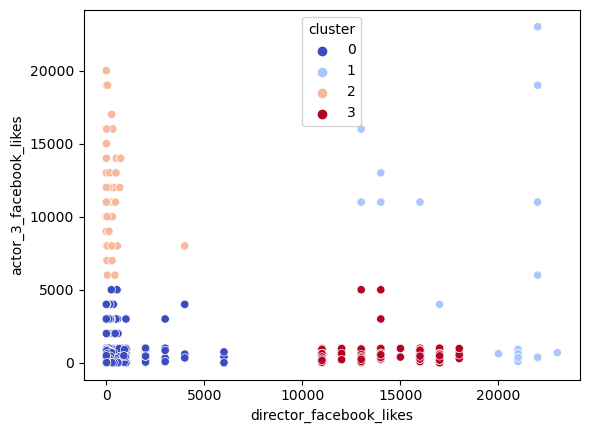

In [12]:
sns.scatterplot(data=df, x=selected_columns[0], y=selected_columns[1], hue="cluster", palette="coolwarm");